In [1]:

import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow

In [2]:
df = wrangle_zillow()
df.head()

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [3]:
#Split the data before performing scaling on the train portion
seed = 42

train, valid_test = train_test_split(df, test_size=0.3,
                                     random_state=seed)

valid, test = train_test_split(valid_test, test_size=0.5,
                               random_state=seed)

In [6]:

X_train = train.drop(columns=['tax_value'])

In [8]:
#Looking at the value counts for bathrooms
X_train['bath_cnt'].value_counts()

2.00    658154
3.00    291164
1.00    288609
2.50     99589
4.00     52049
1.50     21777
3.50     18871
5.00     14646
4.50     11747
6.00      3793
5.50      2900
0.00      2898
0.50         9
1.75         2
Name: bath_cnt, dtype: int64

In [10]:
#Create an arbitrary subset that's easier to work with
train_subset = X_train[X_train['bath_cnt'] <= 8]

In [11]:
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(train_subset)

train_mms = mms.transform(train_subset)

In [12]:
#Is there a mistake here?
pd.DataFrame(train_mms, columns=list(train_subset.columns)).head()

,bedroom_cnt,bath_cnt,SqFt,year_built,tax_amount,fips
0,0.500000,0.333333,0.001802,0.697674,0.065171,0.000000
1,0.666667,0.333333,0.001428,0.786047,0.022659,1.000000
2,0.333333,0.333333,0.002241,0.823256,0.080201,0.297297
3,0.500000,0.250000,0.001003,0.748837,0.023844,1.000000
4,0.666667,0.333333,0.001955,0.776744,0.007997,1.000000


Text(0.5, 1.0, 'Scaled')

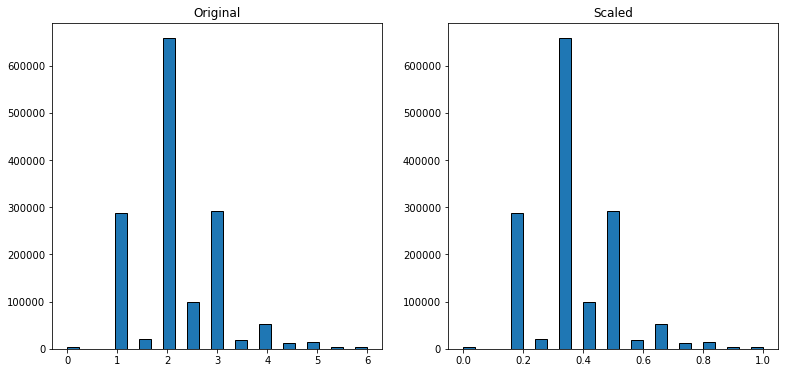

In [14]:
#Visualize the difference between unscaled/scaled data
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bath_cnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_mms[:,1], bins=25, ec='black')
plt.title('Scaled')

In [15]:
#fit the robust scaler 
rs = sklearn.preprocessing.RobustScaler()

rs.fit(train_subset)

train_rs = rs.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

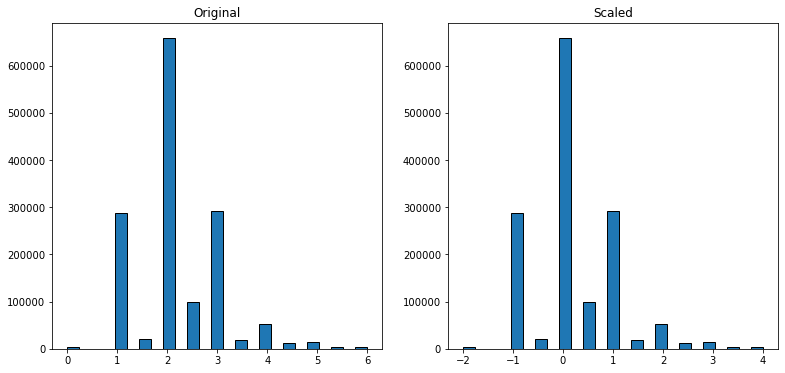

In [17]:
#Visualize the data before and after scaling
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bath_cnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_rs[:,1], bins=25, ec='black')
plt.title('Scaled')

2

In [18]:
# inverse_transform
rs.inverse_transform(train_rs)


array([[3.00000e+00, 2.00000e+00, 1.71800e+03, 1.95100e+03, 6.54775e+03,
        6.03700e+03],
       [4.00000e+00, 2.00000e+00, 1.36100e+03, 1.97000e+03, 2.28074e+03,
        6.11100e+03],
       [2.00000e+00, 2.00000e+00, 2.13600e+03, 1.97800e+03, 8.05638e+03,
        6.05900e+03],
       ...,
       [3.00000e+00, 1.00000e+00, 1.00000e+03, 1.95100e+03, 8.68320e+02,
        6.03700e+03],
       [3.00000e+00, 2.00000e+00, 1.69300e+03, 1.97600e+03, 3.51384e+03,
        6.11100e+03],
       [2.00000e+00, 1.00000e+00, 1.07500e+03, 1.96100e+03, 3.21492e+03,
        6.03700e+03]])

In [19]:
pd.DataFrame(rs.inverse_transform(train_rs))

,0,1,2,3,4,5
0,3.0,2.0,1718.0,1951.0,6547.75,6037.0
1,4.0,2.0,1361.0,1970.0,2280.74,6111.0
2,2.0,2.0,2136.0,1978.0,8056.38,6059.0
3,3.0,1.5,956.0,1962.0,2399.60,6111.0
4,4.0,2.0,1863.0,1968.0,809.02,6111.0
...,...,...,...,...,...,...
1466203,3.0,2.0,1768.0,1950.0,3376.60,6059.0
1466204,3.0,1.0,1498.0,1908.0,5023.30,6111.0
1466205,3.0,1.0,1000.0,1951.0,868.32,6037.0
1466206,3.0,2.0,1693.0,1976.0,3513.84,6111.0


In [20]:
train_subset.head()

,bedroom_cnt,bath_cnt,SqFt,year_built,tax_amount,fips
781667,3,2.0,1718,1951,6547.75,6037
1766333,4,2.0,1361,1970,2280.74,6111
192985,2,2.0,2136,1978,8056.38,6059
1465240,3,1.5,956,1962,2399.60,6111
377201,4,2.0,1863,1968,809.02,6111


3

In [21]:
# fit quantile transformer to a variable
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

qt.fit(train_subset)

train_qt = qt.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

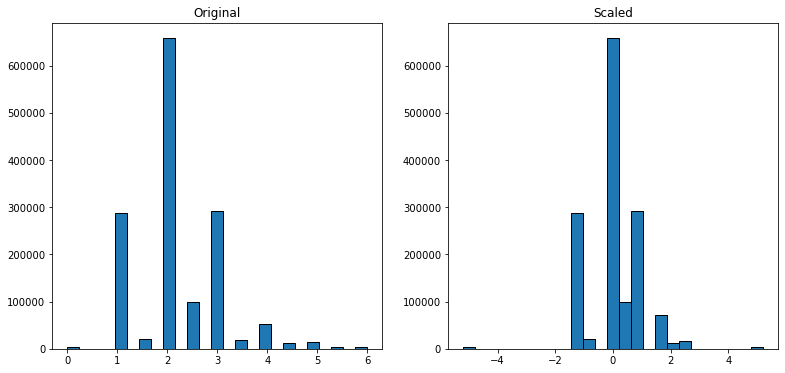

In [22]:
#Visualize the results of normalized quantile transformation
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bath_cnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt[:,1], bins=25, ec='black')
plt.title('Scaled')

4

In [23]:
#quantile transformer without normalization
qt2 = sklearn.preprocessing.QuantileTransformer()

qt2.fit(train_subset)

train_qt2 = qt2.transform(train_subset)

Text(0.5, 1.0, 'Scaled')

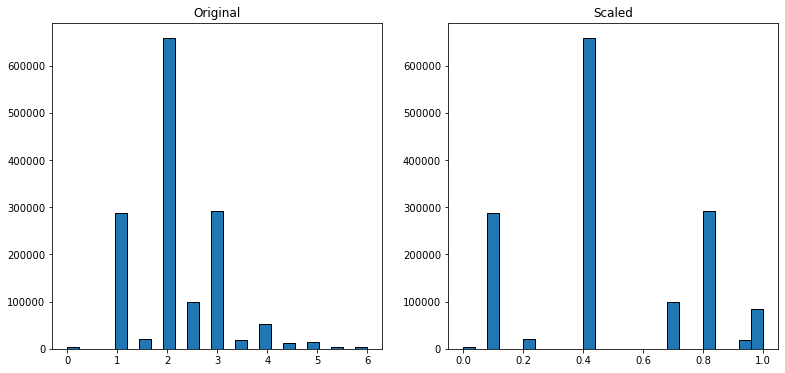

In [24]:
#Visualize the results
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_subset['bath_cnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_qt2[:,1], bins=25, ec='black')
plt.title('Scaled')